[*********************100%***********************]  1 of 1 completed
Mean Squared Error: 12898.744721151574


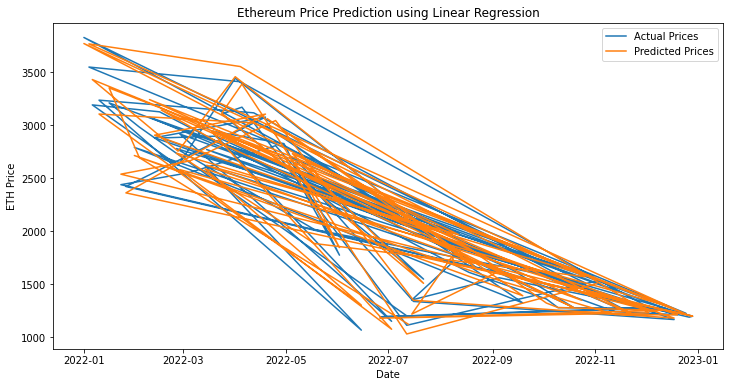

In [2]:
#Linear regression
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to collect data from Yahoo Finance
def get_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to perform linear regression
def perform_linear_regression(data):
    # Use 'Close' price as the dependent variable
    y = data['Close']

    # Shift 'Close' prices to create the target variable
    y = y.shift(-1).dropna()

    # Use 'Close', 'Open', 'High', 'Low', and 'Volume' as independent variables
    X = data[['Close', 'Open', 'High', 'Low', 'Volume']].iloc[:-1].dropna()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')

    # Plot the predictions vs. actual values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test.values, label='Actual Prices')
    plt.plot(y_test.index, predictions, label='Predicted Prices')
    plt.title('Ethereum Price Prediction using Linear Regression')
    plt.xlabel('Date')
    plt.ylabel('ETH Price')
    plt.legend()
    plt.show()

# Define the ticker symbol
symbol = 'ETH-USD'

# Set the start and end dates for data collection
start_date = '2022-01-01'
end_date = '2023-01-01'

# Collect historical data
eth_data = get_historical_data(symbol, start_date, end_date)

# Perform linear regression
perform_linear_regression(eth_data)


In [2]:
#feedforward neural network
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

import yfinance as yf

# Define the symbol and time period
symbol = 'ETH-USD'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Download historical data
eth_data = yf.download(symbol, start=start_date, end=end_date)

# Feature selection
features = ['Open', 'High', 'Low', 'Volume']
X = eth_data[features]
y = eth_data['Close']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions to the original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')


[*********************100%***********************]  1 of 1 completed
Epoch 1/50
8/8 [==============================] - 1s 17ms/step - loss: 0.1597 - val_loss: 0.1062
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0649 - val_loss: 0.0421
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0241 - val_loss: 0.0152
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0107 - val_loss: 0.0095
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0048
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 5.9320e-04 - val_loss: 6.9859e-04
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 5.6262e-04 - val_loss: 6.4019e-04
Epoch 10/50
8/8 [==============================] -

In [6]:
#LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Assuming eth_data is your DataFrame with Ethereum price data 

# Assuming 'Close' is the column containing closing prices
prices = eth_data['Close'].values.astype(float)
prices = prices.reshape(-1, 1)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Split the dataset into training and testing sets
train_size = int(len(prices_scaled) * 0.67)
test_size = len(prices_scaled) - train_size
train, test = prices_scaled[0:train_size, :], prices_scaled[train_size:len(prices_scaled), :]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(prices_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(prices_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) - 1:len(prices_scaled) - 1, :] = testPredict


# Plot the baseline and predictions
plt.plot(scaler.inverse_transform(prices_scaled), label='Actual Prices')
plt.plot(trainPredictPlot, label='Training Predictions')
plt.plot(testPredictPlot, label='Testing Predictions')
plt.legend()
plt.show()


Epoch 1/50
240/240 - 1s - loss: 0.1798 - 1s/epoch - 5ms/step
Epoch 2/50
240/240 - 0s - loss: 0.0291 - 277ms/epoch - 1ms/step
Epoch 3/50
240/240 - 0s - loss: 0.0152 - 220ms/epoch - 915us/step
Epoch 4/50
240/240 - 0s - loss: 0.0080 - 250ms/epoch - 1ms/step
Epoch 5/50
240/240 - 0s - loss: 0.0043 - 274ms/epoch - 1ms/step
Epoch 6/50
240/240 - 0s - loss: 0.0029 - 244ms/epoch - 1ms/step
Epoch 7/50
240/240 - 0s - loss: 0.0025 - 241ms/epoch - 1ms/step
Epoch 8/50
240/240 - 0s - loss: 0.0024 - 273ms/epoch - 1ms/step
Epoch 9/50
240/240 - 0s - loss: 0.0023 - 235ms/epoch - 978us/step
Epoch 10/50
240/240 - 0s - loss: 0.0023 - 251ms/epoch - 1ms/step
Epoch 11/50
240/240 - 0s - loss: 0.0023 - 234ms/epoch - 976us/step
Epoch 12/50
240/240 - 0s - loss: 0.0023 - 250ms/epoch - 1ms/step
Epoch 13/50
240/240 - 0s - loss: 0.0021 - 234ms/epoch - 975us/step
Epoch 14/50
240/240 - 0s - loss: 0.0022 - 249ms/epoch - 1ms/step
Epoch 15/50
240/240 - 0s - loss: 0.0021 - 236ms/epoch - 984us/step
Epoch 16/50
240/240 - 0s - 

ValueError: could not broadcast input array from shape (117,1) into shape (119,1)

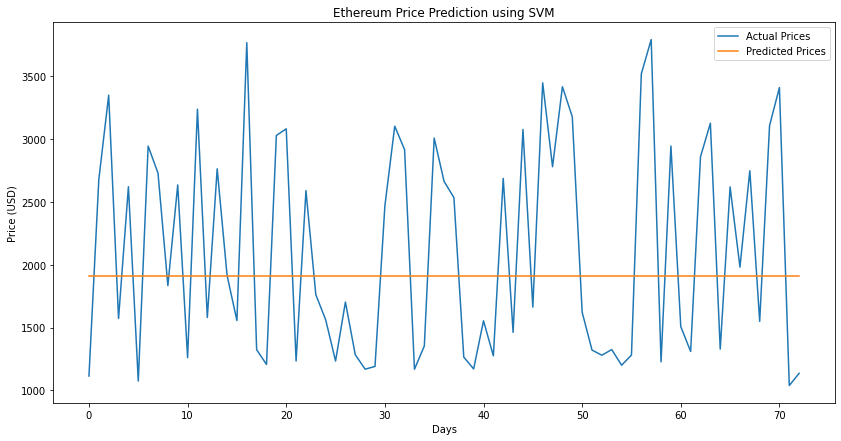

In [8]:
#SVM
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Assuming eth_data is your DataFrame with Ethereum price data 
# Make sure you have 'Close' column in your DataFrame

# Feature selection
X = eth_data[['Close', 'Open', 'High', 'Low', 'Volume']].values

# Target variable
y = eth_data['Close'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the model
svr_rbf.fit(X_train, y_train)

# Make predictions
y_pred = svr_rbf.predict(X_test)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Ethereum Price Prediction using SVM')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
